# CCL precision of cluster lensing quantities

The "out-of-the-box" numerical integration of CCL to compute the Sigma and DeltaSigma profiles relevant to cluster lensing do not reach the same level of precision as NumCosmo or Colossus. In this NB, we use the NFW profile to explore the precision parameters available in CCL; the goal is to see if we can get a better match between the quantities integrated numerically and the analytical solution available.

This uses CCL only. Comparison with NumCosmo and Colossus using the default parameters is available in the `validation_tests.ipynb` notebook in this directory.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pyccl as ccl

In [3]:
ccl.__version__

'2.1.0'

In [4]:
# CCL Cosmology
cosmo_ccl = ccl.Cosmology(Omega_c=0.2621, Omega_b=0.049, h=0.6766, n_s=0.9665, sigma8=0.8102)

In [5]:
print(cosmo_ccl)

pyccl.Cosmology(Omega_c=0.2621, Omega_b=0.049, h=0.6766, n_s=0.9665, sigma8=0.8102, A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, T_CMB=None, bcm_log10Mc=14.079181246047625, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, sigma_0=0.0, m_nu=0.0, m_nu_type=None, z_mg=None, df_mg=None, transfer_function='boltzmann_camb', matter_power_spectrum='halofit', baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', emulator_neutrinos='strict')


In [6]:
cosmo_ccl = ccl.Cosmology(Omega_c=0.2621, Omega_b=0.049, h=0.6766, n_s=0.9665, A_s=2.1e-09)

In [56]:
Delta = 200
Mvir  = 1.0e15 # M_sun
cvir  = 5.0
z     = 0.2
a     = 1.0 / (1.0 + z)

# CCL
MDEF               = 'matter'
mdef               = ccl.halos.MassDef (Delta, MDEF)
conc               = ccl.halos.ConcentrationConstant(cvir, mdef=mdef)
mdef = ccl.halos.MassDef(Delta, 'matter', c_m_relation=conc)
#mdef.concentration = conc

# ccl_nfw_num            = ccl.halos.HaloProfileNFW (conc,
#                                                truncated = False, 
#                                                projected_analytic = False, 
#                                                cumul2d_analytic = False)
                                
ccl_nfw_ana            = ccl.halos.HaloProfileNFW (conc,
                                               truncated = False, 
                                               projected_analytic = True, 
                                               cumul2d_analytic = True)

ccl_nfw_num            = ccl.halos.HaloProfileNFW (conc,
                                               truncated = False, 
                                               projected_analytic = False, 
                                               cumul2d_analytic = False, 
                                                fourier_analytic=False)
                                
# ccl_nfw_ana            = ccl.halos.HaloProfileNFW (conc,
#                                                truncated = False, 
#                                                projected_analytic = True, 
#                                                cumul2d_analytic = True,
#                                                   fourier_analytic=True)


# concentration = 5
# halomass = 1E15
# halomassdef = 200
# rmin = 0.0005
# rmax = 100
# z = 0.2
# a = 1./(1+z)
# r = np.geomspace(rmin, rmax, 2048)
# mdef = ccl.halos.MassDef(halomassdef, 'matter')
# c = ccl.halos.ConcentrationConstant(c=concentration, mdef=mdef)
# mdef = ccl.halos.MassDef(halomassdef, 'matter', c_m_relation=c)

# p_p1_f1 = ccl.halos.HaloProfileNFW(c, truncated=False,
#                                    projected_analytic=True,
#                                    fourier_analytic=True)
# p_p0_f0_fl = ccl.halos.HaloProfileNFW(c, truncated=False,
#                                       projected_analytic=False,
#                                       fourier_analytic=False)
# p_p0_f0_bf = ccl.halos.HaloProfileNFW(c, truncated=False,
#                                       projected_analytic=False,
#                                       fourier_analytic=False)


In [57]:
#r1 = 10**np.arange (0, 5, 0.02) * 1.0e-3 # Mpc - physical
#r2 = 10**np.arange (0, 4, 0.02) * 1.0e-3 # Mpc - physical
r1 = np.geomspace(1.e-3, 100, 2048)
r2 = np.geomspace(1.e-3, 10, 2048)


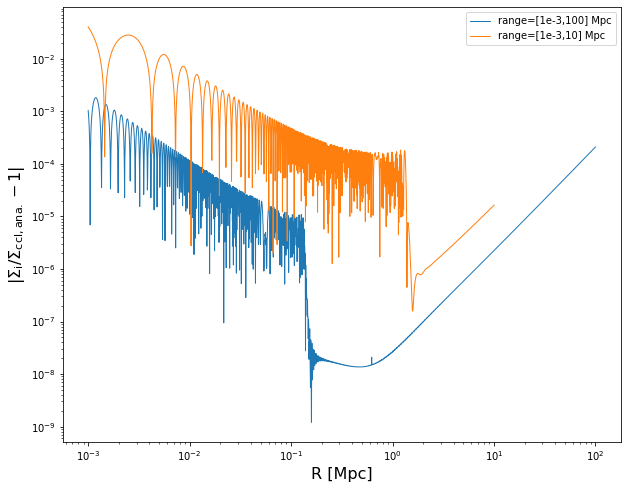

In [58]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
ax.set_xscale ('log')
ax.set_yscale ('log')  
ax.set_xlabel('R [Mpc]', fontsize=16)
ax.set_ylabel(r'$|\Sigma_{\mathrm{i}} / \Sigma_{\mathrm{ccl, ana.}} - 1|$', fontsize=16)

ccl_Sigma_nfw_ana1 = ccl_nfw_ana.projected (cosmo_ccl, r1, Mvir, a, mdef)
ccl_Sigma_nfw_ana2 = ccl_nfw_ana.projected (cosmo_ccl, r2, Mvir, a, mdef)
ccl_Sigma_nfw_num1 = ccl_nfw_num.projected (cosmo_ccl, r1, Mvir, a, mdef)
ccl_Sigma_nfw_num2 = ccl_nfw_num.projected (cosmo_ccl, r2, Mvir, a, mdef)
# ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r , Mvir, a, mdef)
# ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r , Mvir, a, mdef)

ax.plot (r1, np.abs ((ccl_Sigma_nfw_num1 / ccl_Sigma_nfw_ana1) - 1.0), lw=1, label='range=[1e-3,100] Mpc')
ax.plot (r2, np.abs ((ccl_Sigma_nfw_num2 / ccl_Sigma_nfw_ana2) - 1.0), lw=1, label='range=[1e-3,10] Mpc')

ax.legend()
    

In [44]:
len(r2)

2048

### 0. List of precision parameters available

In [ ]:
ccl_nfw_num.precision_fftlog

### 1.`n_per_decade` parameter --> can improve things marginally

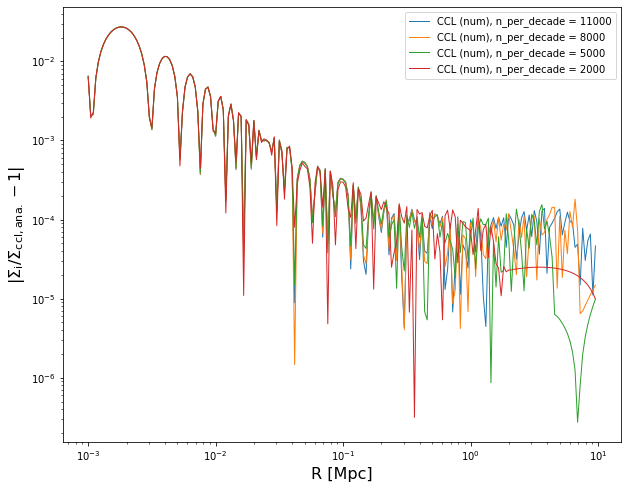

In [11]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
ax.set_xscale ('log')
ax.set_yscale ('log')  
ax.set_xlabel('R [Mpc]', fontsize=16)
ax.set_ylabel(r'$|\Sigma_{\mathrm{i}} / \Sigma_{\mathrm{ccl, ana.}} - 1|$', fontsize=16)

for n in np.arange(11000,1000,-3000):
    ccl_nfw_num.update_precision_fftlog (n_per_decade = n)

    ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2 
    ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2
#     ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r , Mvir, a, mdef)
#     ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r , Mvir, a, mdef)

    ax.plot (r, np.abs ((ccl_Sigma_nfw_num / ccl_Sigma_nfw_ana) - 1.0), 
             label = "CCL (num), n_per_decade = "+str(n), lw=1)

ax.legend()
    

### 2.`padding_*_fftlog` parameters --> remove oscillations

In [ ]:
#reset n_per_decade to default
ccl_nfw_num.update_precision_fftlog (n_per_decade = 1000) # default

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
ax.set_xscale ('log')
ax.set_yscale ('log')  
ax.set_xlabel('R [Mpc]', fontsize=16)
ax.set_ylabel(r'$|\Sigma_{\mathrm{i}} / \Sigma_{\mathrm{ccl, ana.}} - 1|$', fontsize=16)

for fact in np.logspace(2,4,3):
    ccl_nfw_num.update_precision_fftlog (padding_lo_fftlog=1./fact)
    ccl_nfw_num.update_precision_fftlog (padding_hi_fftlog=fact)


# CCL
    ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2
    ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2

    ax.plot (r, np.abs (ccl_Sigma_nfw_num / ccl_Sigma_nfw_ana - 1.0), 
             label = "CCL (num), padding_fftlog = "+str(fact), lw=1)

ax.legend()

### 3. `padding_*_extra` paramters --> no effect

In [ ]:
#reset padding to default
ccl_nfw_num.update_precision_fftlog (padding_lo_fftlog = 0.01)
ccl_nfw_num.update_precision_fftlog (padding_hi_fftlog = 100)

fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
ax.set_xscale ('log')
ax.set_yscale ('log')    
ax.set_xlabel('R [Mpc]', fontsize=16)
ax.set_ylabel(r'$|\Sigma_{\mathrm{i}} / \Sigma_{\mathrm{ccl, ana.}} - 1|$', fontsize=16)

for fact in np.logspace(1,3,5):
    ccl_nfw_num.update_precision_fftlog (padding_lo_extra=1./fact)
    ccl_nfw_num.update_precision_fftlog (padding_hi_extra=fact)


# CCL
    ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2
    ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2

    ax.plot (r, np.abs (ccl_Sigma_nfw_num / ccl_Sigma_nfw_ana - 1.0), 
             label = "CCL (num)", linestyle='--', lw=1)


### 4.`extrapol` parameter --> no effect

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
ax.set_xscale ('log')
ax.set_yscale ('log')  
ax.set_xlabel('R [Mpc]', fontsize=16)
ax.set_ylabel(r'$|\Sigma_{\mathrm{i}} / \Sigma_{\mathrm{ccl, ana.}} - 1|$', fontsize=16)

for ep in ['linx_logy','logx_logy','linx_liny']:
    ccl_nfw_num.update_precision_fftlog (extrapol=ep)
    print(ep)

# CCL
    ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2
    ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2

    ax.plot (r, np.abs (ccl_Sigma_nfw_num / ccl_Sigma_nfw_ana - 1.0), 
             label = "CCL (num)", linestyle='--', lw=1)


### 5.`plaw_projected` parameter --> some effect
The default value seems to be the best compromise for acceptable behaviour at low and high radii.

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
ax.set_xscale ('log')
ax.set_yscale ('log')  
ax.set_xlabel('R [Mpc]', fontsize=16)
ax.set_ylabel(r'$|\Sigma_{\mathrm{i}} / \Sigma_{\mathrm{ccl, ana.}} - 1|$', fontsize=16)

for p in [-1.5,-0.5, -1]:
    ccl_nfw_num.update_precision_fftlog (plaw_projected=p)

# CCL
    ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2
    ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2

    ax.plot (r, np.abs (ccl_Sigma_nfw_num / ccl_Sigma_nfw_ana - 1.0), 
             label = "CCL (num), plaw_projected = "+str(p), lw=1)
ax.legend()


### 6.`plaw_fourier` parameter --> no effect

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1,figsize=(10,8))
ax.set_xscale ('log')
ax.set_yscale ('log')  
ax.set_xlabel('R [Mpc]', fontsize=16)
ax.set_ylabel(r'$|\Sigma_{\mathrm{i}} / \Sigma_{\mathrm{ccl, ana.}} - 1|$', fontsize=16)

for p in [-2.5,-1.5,-2]:
    ccl_nfw_num.update_precision_fftlog (plaw_fourier=p)

    ccl_Sigma_nfw_ana = ccl_nfw_ana.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2
    ccl_Sigma_nfw_num = ccl_nfw_num.projected (cosmo_ccl, r / a, Mvir, a, mdef) / a**2

    ax.plot (r, np.abs (ccl_Sigma_nfw_num / ccl_Sigma_nfw_ana - 1.0), 
             label = "CCL (num), plaw_fourier = "+str(p), linestyle='--', lw=1)
ax.legend()
